# Bharath Intern Task 1

# Netflix Stock Price Prediction

### dataset details

##### Date: everyday price
##### open: Price at which stock opened
##### high: Today's High
##### low:  Today's Low
##### close: Close price adjusted for splits
##### adj close: Adjusted close price adjusted for splits and dividend and/or capital gain distributions
##### volume: volume of stocks

In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:

pip install keras

In [1]:
# importing necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\aswin\Downloads\archive (6)\NFLX.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [18]:

df.shape

(1009, 7)

In [19]:
# dataset have 1009 rows and 7 columns

In [20]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [5]:
#checking info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [7]:
# statistical distribution

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [9]:
# checking null values

In [10]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
# there are no null values in the dataset

In [12]:
df.nunique()

Date         1009
Open          976
High          983
Low           989
Close         988
Adj Close     988
Volume       1005
dtype: int64

In [15]:
# checking for duplicates

In [16]:
df.duplicated().sum()

0

In [17]:
# the dataset doesn't have any duplicates

In [21]:
df['Date'].nunique()

1009

### checkiing missing dates and adding necessary dates

In [24]:
from datetime import datetime
a =df['Date'].min()
b =df['Date'].max()
A1 = datetime.strptime(b, "%Y-%m-%d")
B2 = datetime.strptime(a, "%Y-%m-%d")
diff = B2-A1
print(f'Difference is {diff.days} days')

Difference is -1460 days


In [25]:
df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [26]:
df = df.resample('D').ffill().reset_index()
df['Date'].nunique()

1461

In [35]:
#plotting

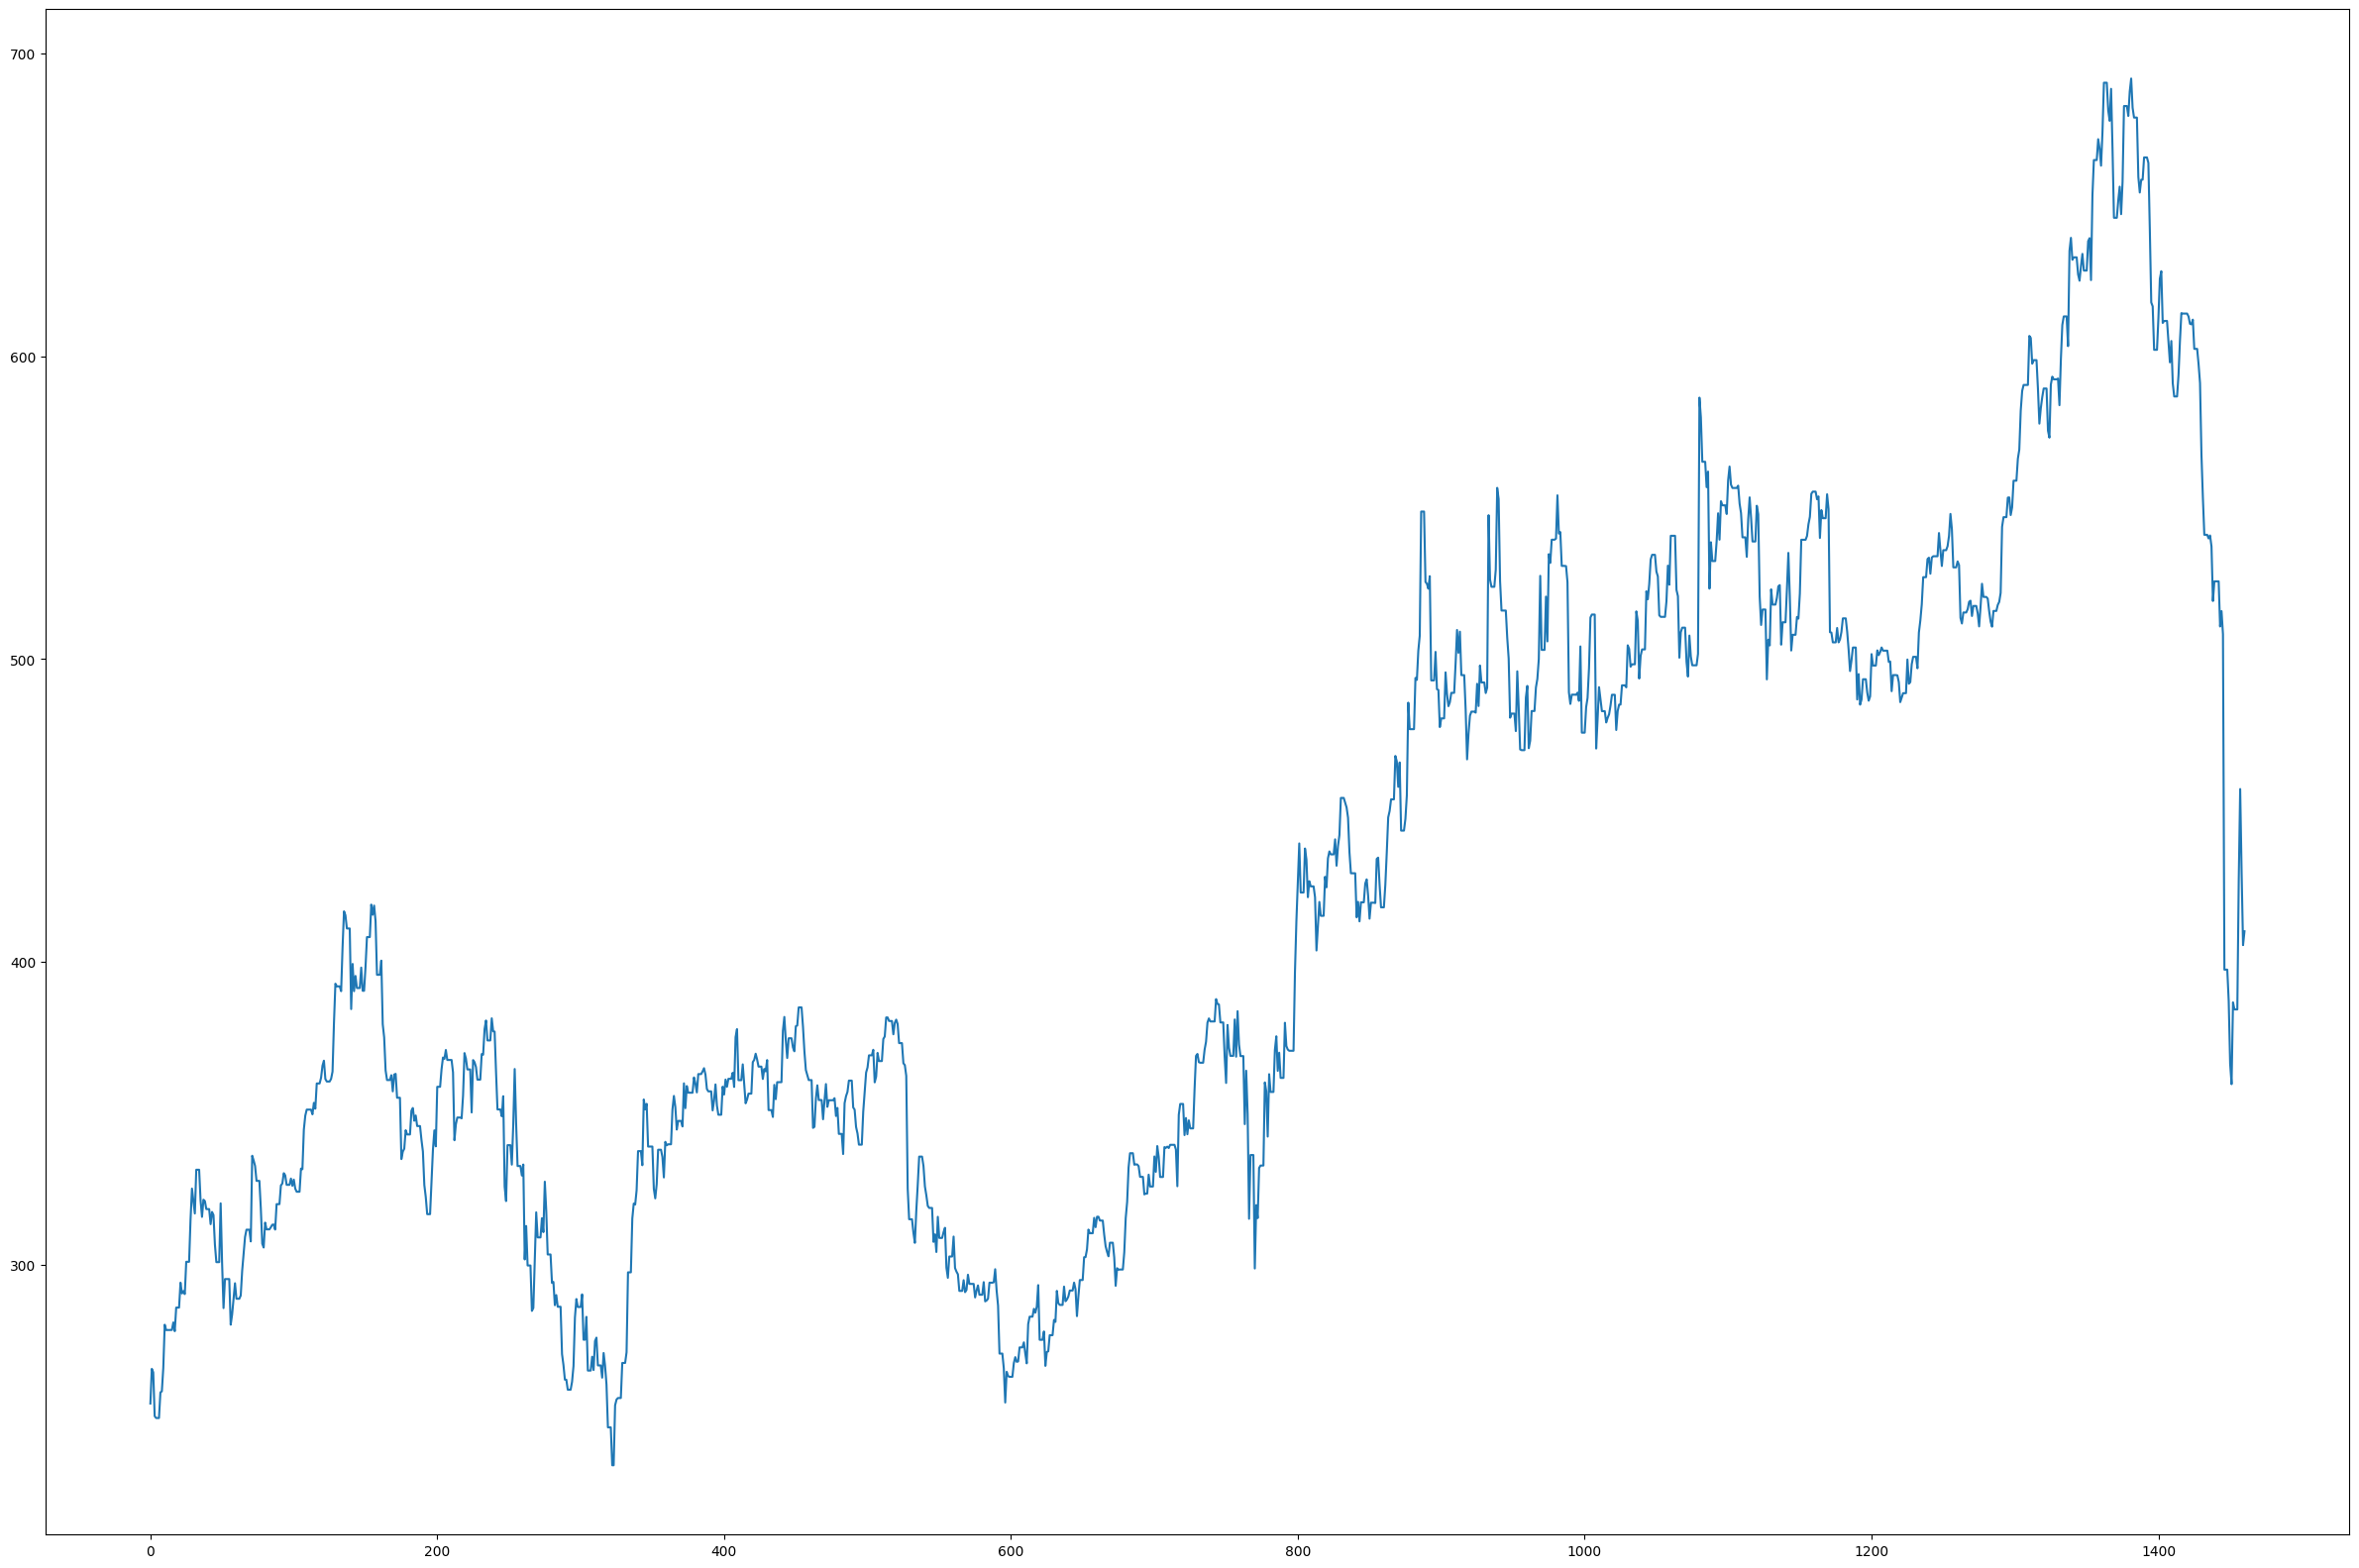

In [27]:
plt.figure(figsize=(30,20))
plt.plot(df['Close'])
plt.show()

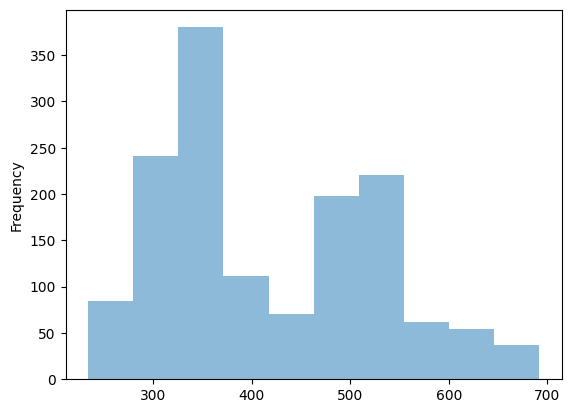

In [28]:
df["Close"].plot.hist(alpha=0.5)
plt.show()

## spliting data for training

In [29]:
train_df=df[:900] 
test_df=df[900:]

In [31]:
train_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
895,2020-07-19,494.869995,503.589996,484.140015,492.989990,492.989990,24991400
896,2020-07-20,489.140015,504.500000,484.200012,502.410004,502.410004,11940300
897,2020-07-21,506.000000,506.220001,488.609985,490.100006,490.100006,9113700
898,2020-07-22,492.190002,497.200012,487.200012,489.820007,489.820007,6954100


In [33]:
test_df

,Date,Open,High,Low,Close,Adj Close,Volume
900,2020-07-24,468.769989,487.170013,467.540009,480.450012,480.450012,7746200
901,2020-07-25,468.769989,487.170013,467.540009,480.450012,480.450012,7746200
902,2020-07-26,468.769989,487.170013,467.540009,480.450012,480.450012,7746200
903,2020-07-27,484.510010,496.920013,482.309998,495.649994,495.649994,7863100
904,2020-07-28,496.019989,497.790009,487.760010,488.510010,488.510010,5986700
...,...,...,...,...,...,...,...
1456,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1457,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1458,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1459,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [34]:
train=train_df.loc[:,["Open"]].values

In [36]:
len(train)

900

In [37]:
# 900 is the length of training set

## Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler
Mn=MinMaxScaler(feature_range=(0,1))
train_scaled=Mn.fit_transform(train)

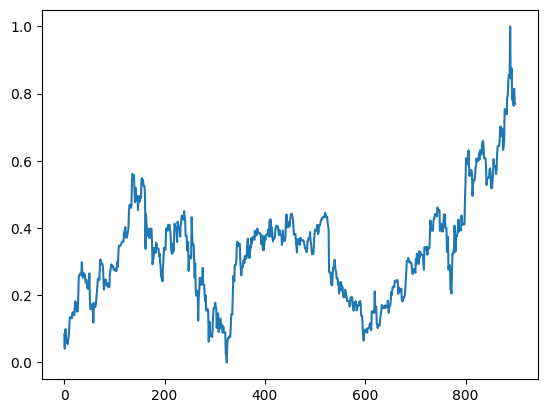

In [39]:
plt.plot(train_scaled)
plt.show()

In [40]:

x_train=[]
y_train=[]
timesteps=50
for i in range(timesteps,len(train_scaled)):
    x_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [41]:
len(x_train)

850

In [42]:
len(y_train)

850

In [43]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [44]:

x_train

array([[[0.08405677],
        [0.04125007],
        [0.09776684],
        ...,
        [0.21999045],
        [0.21999045],
        [0.22582767]],

       [[0.04125007],
        [0.09776684],
        [0.09926358],
        ...,
        [0.21999045],
        [0.22582767],
        [0.265132  ]],

       [[0.09776684],
        [0.09926358],
        [0.05965997],
        ...,
        [0.22582767],
        [0.265132  ],
        [0.19298934]],

       ...,

       [[0.55352332],
        [0.5745974 ],
        [0.5778304 ],
        ...,
        [0.78114713],
        [0.78114713],
        [0.76399458]],

       [[0.5745974 ],
        [0.5778304 ],
        [0.56418017],
        ...,
        [0.78114713],
        [0.76399458],
        [0.81446452]],

       [[0.5778304 ],
        [0.56418017],
        [0.51897869],
        ...,
        [0.76399458],
        [0.81446452],
        [0.77312464]]])

In [45]:
import seaborn as sns

In [47]:
dx=df.corr()
dx

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998737,0.998510,0.997024,0.997024,-0.409946
High,0.998737,1.000000,0.998237,0.998603,0.998603,-0.396414
Low,0.998510,0.998237,1.000000,0.998571,0.998571,-0.427437
Close,0.997024,0.998603,0.998571,1.000000,1.000000,-0.409661
Adj Close,0.997024,0.998603,0.998571,1.000000,1.000000,-0.409661
Volume,-0.409946,-0.396414,-0.427437,-0.409661,-0.409661,1.000000


<Axes: >

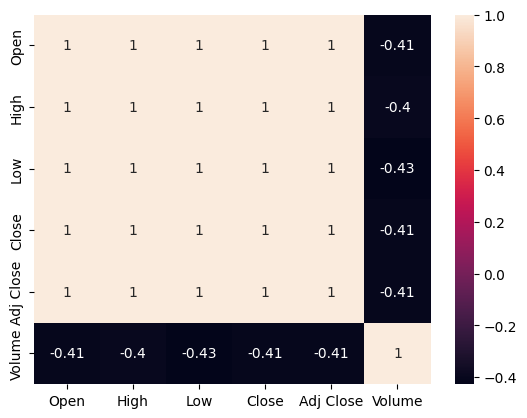

In [48]:
sns.heatmap(dx, annot=True)

# countplot

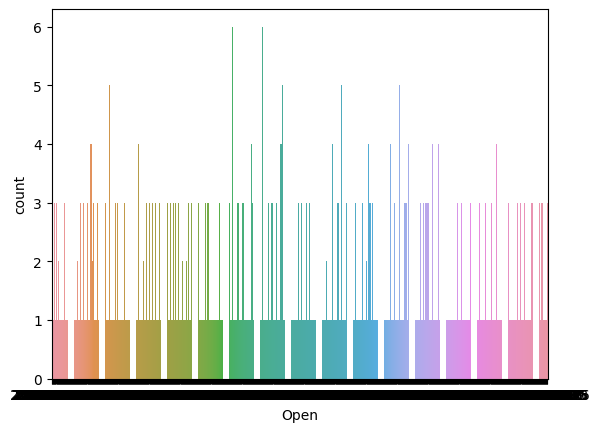

In [49]:
sns.countplot(x=df["Open"])
plt.show()

# modeling

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [51]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
27/27 [==============================] - 20s 112ms/step - loss: 0.0337
Epoch 2/10
27/27 [==============================] - 3s 107ms/step - loss: 0.0082
Epoch 3/10
27/27 [==============================] - 2s 92ms/step - loss: 0.0059
Epoch 4/10
27/27 [==============================] - 2s 89ms/step - loss: 0.0059
Epoch 5/10
27/27 [==============================] - 3s 104ms/step - loss: 0.0051
Epoch 6/10
27/27 [==============================] - 3s 122ms/step - loss: 0.0053
Epoch 7/10
27/27 [==============================] - 3s 118ms/step - loss: 0.0057
Epoch 8/10
27/27 [==============================] - 3s 117ms/step - loss: 0.0048
Epoch 9/10
27/27 [==============================] - 3s 112ms/step - loss: 0.0055
Epoch 10/10
27/27 [==============================] - 3s 110ms/step - loss: 0.0048


In [52]:
dataset=pd.concat((train_df["Open"],test_df["Open"]), axis=0)
inputs= dataset[len(dataset)-len(test_df)-timesteps:].values.reshape(-1,1)
inputs=Mn.transform(inputs)

# netflix stock prediction

In [53]:
x_test=[]
for i in range(timesteps,timesteps+len(test_df)):
    x_test.append(inputs[i-timesteps:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=model.predict(x_test)
predicted_stock_price=Mn.inverse_transform(predicted_stock_price)

18/18 [==============================] - 4s 34ms/step


In [54]:
real_stock_price=test_df.loc[:,["Open"]].values

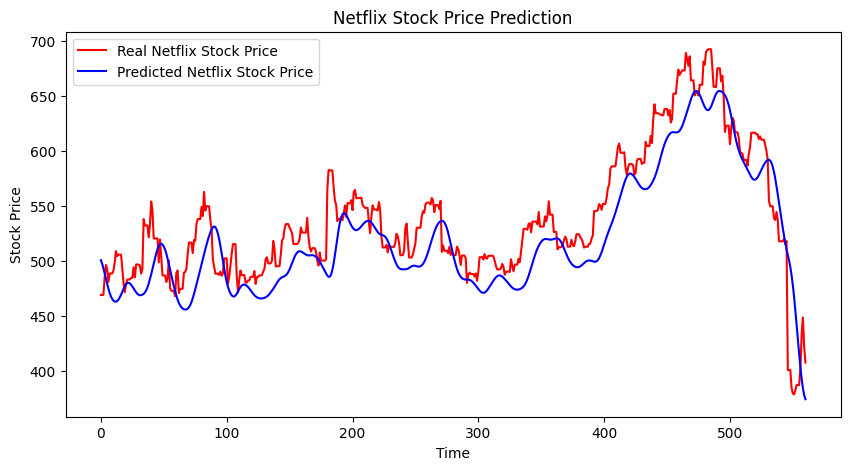

In [55]:
plt.figure(figsize=(10,5))
plt.plot(real_stock_price,color="red",label="Real Netflix Stock Price")
plt.plot(predicted_stock_price,color="blue",label="Predicted Netflix Stock Price")
plt.title("Netflix Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()